# 损失函数

这一节我们来详细说一下损失函数。还是老套路，先加载相关的库。

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()

/home/lxa/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 数值预测

常用loss：
1. L2 loss
2. L1 loss
3. Pseudo-Huber loss

In [8]:
x_vals = tf.linspace(-1.,1.,500)
target = tf.constant(0.)

# L2 loss
# loss = (predict - target)^2
l2_loss = tf.square(target-x_vals)
l2_loss_out = sess.run(l2_loss)

In [10]:
# L1 loss
# loss = |predict - target|
l1_loss = tf.abs(target - x_vals)
l1_loss_out = sess.run(l1_loss)

In [11]:
# Pseudo-Huber loss
# L = delta^2 * (sqrt(1 + ((pred - actual)/delta)^2) - 1)

# Pseudo-Huber with delta = 0.25
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)

# Pseudo-Huber with delta = 5
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

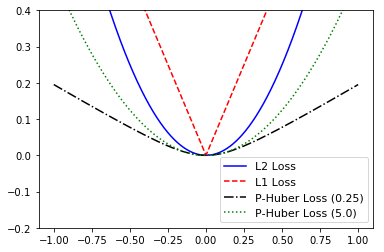

In [13]:
# 可视化
x_array = sess.run(x_vals)
plt.plot(x_array, l2_loss_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_loss_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()


# 类别预测

常用loss：
1. Hinge Loss
2. Cross Entropy Loss
3. Sigmoid Entropy Loss(常用)
4. Weighted (Softmax) Cross Entropy Loss（常用）


In [17]:
# Hinge Loss
# Use for predicting binary (-1, 1) classes
# L = max(0, 1 - (pred * actual))
Hinge_loss = tf.maximum(0.,1. - tf.multiply(target, x_vals))
hinge_loss_out = sess.run(Hinge_loss)

In [18]:
# Cross entropy loss
# L = -actual * (log(pred)) - (1-actual)(log(1-pred))

xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)


In [23]:
# L = -actual * (log(sigmoid(pred))) - (1-actual)(log(1-sigmoid(pred)))
# or
# L = max(actual, 0) - actual * pred + log(1 + exp(-abs(actual)))
targets = tf.fill([500,], 1.)

x_val_input = tf.expand_dims(x_vals, 1)
target_input = tf.expand_dims(targets, 1)
xentropy_sigmoid_y_vals = tf.nn.softmax_cross_entropy_with_logits(logits=x_val_input, labels=target_input)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [25]:
# Weighted (softmax) cross entropy loss
# L = -actual * (log(pred)) * weights - (1-actual)(log(1-pred))
# or
# L = (1 - pred) * actual + (1 + (weights - 1) * pred) * log(1 + exp(-actual))
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

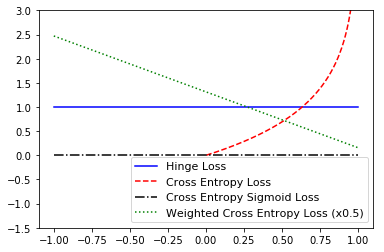

In [26]:
# Plot the output
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_loss_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss (x0.5)')
plt.ylim(-1.5, 3)
#plt.xlim(-1, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()